In [1]:
import numpy as np
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf
import tensorflow.keras.applications.mobilenet
import os
IMG_SAVE_PATH = r"C:\Users\DEVADHARSHINI K\Downloads\archive\Split_smol\train"
Str_to_Int = {
    'Actinic keratosis': 0,
    'Atopic Dermatitis': 1,
    'Benign keratosis': 2,
    'Dermatofibroma': 3,
    'Melanocytic nevus': 4,
    'Melanoma':5,
    'Squamous cell carcinoma': 6,
    'Tinea Ringworm Candidiasis':7,
    'Vascular lesion': 8
}

NUM_CLASSES = 9


def str_to_Int_mapper(val):
    return Str_to_Int[val]

In [2]:
import PIL
import cv2 

dataset = []
for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    for image in os.listdir(path):
        new_path = os.path.join(path, image)
        try:
            imgpath=PIL.Image.open(new_path)
            #if imgpath.shape!=(240,240,3):
            imgpath=imgpath.convert('RGB')
            img = np.asarray(imgpath)
            img = cv2.resize(img, (240,240))
            img=img/255.
            dataset.append([img, directory]) 
        except FileNotFoundError:
            print('Image file not found. Skipping...')

In [3]:
data, labels = zip(*dataset)
temp = list(map(str_to_Int_mapper, labels))
#data[0]
import keras
labels = keras.utils.to_categorical(temp)
count=0
for i in data:
    if i.shape!=(240, 240, 3):
        count=count+1
print(count)

0


In [4]:
def mobilenet():
    model = Sequential([
        tf.keras.applications.mobilenet.MobileNet(input_shape=(240,240, 3), include_top=False),
        Dropout(0.5),
        Convolution2D(9, (1, 1), padding='valid'),
        Activation('relu'),        # Rectified Linear Unit - Activation Function
        GlobalAveragePooling2D(),  # Pooling Layer
        Activation('softmax')      # Softmax - Activation Function - For Multi Class Classification
    ])
    return model

In [5]:
# define the model
model_mobile = mobilenet()
model_mobile.compile(
    optimizer=Adam(learning_rate=0.0001),         # lr = learning_rate
    loss='categorical_crossentropy',   # Multi-class classification
    metrics=['accuracy']  
)

17225924/17225924 [==============================] - 8s 0us/step


In [6]:
model_mobile.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 1024)        0         
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 9)           9225      
                                                                 
 activation (Activation)     (None, 7, 7, 9)           0         
                                                                 
 global_average_pooling2d (G  (None, 9)                0         
 lobalAveragePooling2D)                                          
                                                                 
 activation_1 (Activation)   (None, 9)                 0

In [7]:
history_mobile=model_mobile.fit(np.array(data), np.array(labels), epochs = 5, shuffle = True, validation_split = 0.3)

Epoch 1/5
16/16 [==============================] - 315s 10s/step - loss: 1.7491 - accuracy: 0.3922 - val_loss: 2.8971 - val_accuracy: 0.0095
Epoch 2/5
16/16 [==============================] - 111s 7s/step - loss: 0.5822 - accuracy: 0.8337 - val_loss: 3.5011 - val_accuracy: 0.0095
Epoch 3/5
16/16 [==============================] - 107s 7s/step - loss: 0.2785 - accuracy: 0.9425 - val_loss: 3.5108 - val_accuracy: 0.0381
Epoch 4/5
16/16 [==============================] - 109s 7s/step - loss: 0.1339 - accuracy: 0.9754 - val_loss: 3.8095 - val_accuracy: 0.0762
Epoch 5/5
16/16 [==============================] - 114s 7s/step - loss: 0.0783 - accuracy: 0.9959 - val_loss: 3.9343 - val_accuracy: 0.1048


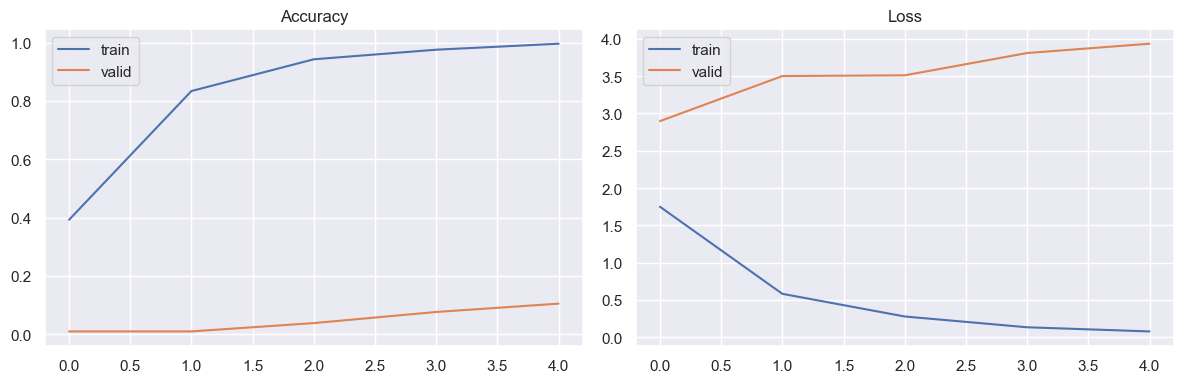

In [9]:
import seaborn as sns
from matplotlib import pyplot
    
def plot_acc(history):
    sns.set()

    fig = pyplot.figure(0, (12, 4))

    ax = pyplot.subplot(1, 2, 1)
    sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
    pyplot.title('Accuracy')
    pyplot.tight_layout()

    ax = pyplot.subplot(1, 2, 2)
    sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
    pyplot.title('Loss')
    pyplot.tight_layout()

    pyplot.show()
plot_acc(history_mobile)

In [10]:
IMG_SAVE_PATH_TESTING = r"C:\Users\DEVADHARSHINI K\Downloads\archive\Split_smol\val"

In [11]:
import cv2
dataset_testing = []
for directory in os.listdir(IMG_SAVE_PATH_TESTING):
    path = os.path.join(IMG_SAVE_PATH_TESTING, directory)
    for image in os.listdir(path):
        new_path = os.path.join(path, image)
        imgpath=PIL.Image.open(new_path)
        #if imgpath.shape!=(240,240,3):
        imgpath=imgpath.convert('RGB')
        img = np.asarray(imgpath)
#         img = cv2.imread(new_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (240, 240))
        img=img/255.
        dataset_testing.append([img, directory]) 

In [12]:
testing_data, testing_labels = zip(*dataset_testing)
testing_temp = list(map(str_to_Int_mapper, testing_labels))
import keras
testing_labels = keras.utils.to_categorical(testing_temp)

In [13]:
model_mobile.evaluate(np.array(testing_data), np.array(testing_labels))

6/6 [==============================] - 7s 1s/step - loss: 2.0624 - accuracy: 0.4972


[2.0623886585235596, 0.49723756313323975]

In [16]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


6/6 [==============================] - 10s 1s/step


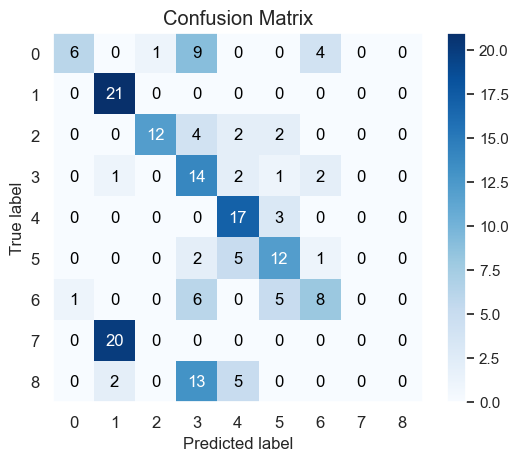

In [17]:
from sklearn.metrics import confusion_matrix
import scikitplot

# Make predictions
def make_preds(model):
    label_preds = model.predict(np.array(testing_data))

    def one_hot_highest(arr):
        for row in arr:
            max_val = max(row)
            for i in range(len(row)):
                if row[i] == max_val:
                    row[i] = 1
                else:
                    row[i] = 0
        return arr

    arr=one_hot_highest(label_preds) #one hot
    arr2= one_hot_highest(testing_labels)

    labelenc=[]
    for i in range (0, len(arr)):
        flag=0
        for j in range (0,9):
            if arr[i][j]==1:
                labelenc.append(j)
                flag=1 
    labelenctest=[]
    for i in range (0, len(arr2)):
        for j in range (0,9):
            if arr2[i][j]==1:
                labelenctest.append(j)

    scikitplot.metrics.plot_confusion_matrix(labelenctest,labelenc)
make_preds(model_mobile)